## Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information

### About Dataset

You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.

In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt

In [2]:
# Read training data and display data head

df = pd.read_csv('C:/Users/singh/Desktop/AV040622/train_wn75k28.csv')
df.head(20)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
5,6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
6,7,2021-01-01,5,1,1.0,2019-07-24,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
8,9,2021-01-01,13,6,3.0,2018-06-21,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,2021-01-01,3,6,2.0,2021-10-20,0,0,0,0,0,1,0,0,0,0,1,0,0


In [3]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

### EXPLORATORY DATA ANALYSIS

In [4]:
#descriptive statistics of the data
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [5]:
#finding the null values
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

### products_purchased & signup_date columns have missing value

In [6]:
df['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

### Handling Missing Values

In [7]:
df['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [8]:
df[df['buy'] == 0]['products_purchased'].isnull().sum()

19866

In [9]:
df[df['buy'] == 0]['signup_date'].isnull().sum()

15088

### Products purchased & signup_date columns have missing values for those rows where the customers have not bought any Product. 

In [10]:
df['products_purchased'] = df['products_purchased'].interpolate( method ='linear',limit_direction='forward')
df['signup_date'] = df['signup_date'].interpolate( method ='linear',limit_direction='forward')

### Applying interpolate Method for all missing values

In [11]:
df.head(20)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.000000,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.000000,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.000000,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.000000,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,2.500000,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
5,6,2021-01-01,3,4,3.000000,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
6,7,2021-01-01,5,1,1.000000,2019-07-24,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,2021-01-01,7,3,2.000000,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
8,9,2021-01-01,13,6,3.000000,2018-06-21,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,2021-01-01,3,6,2.000000,2021-10-20,0,0,0,0,0,1,0,0,0,0,1,0,0


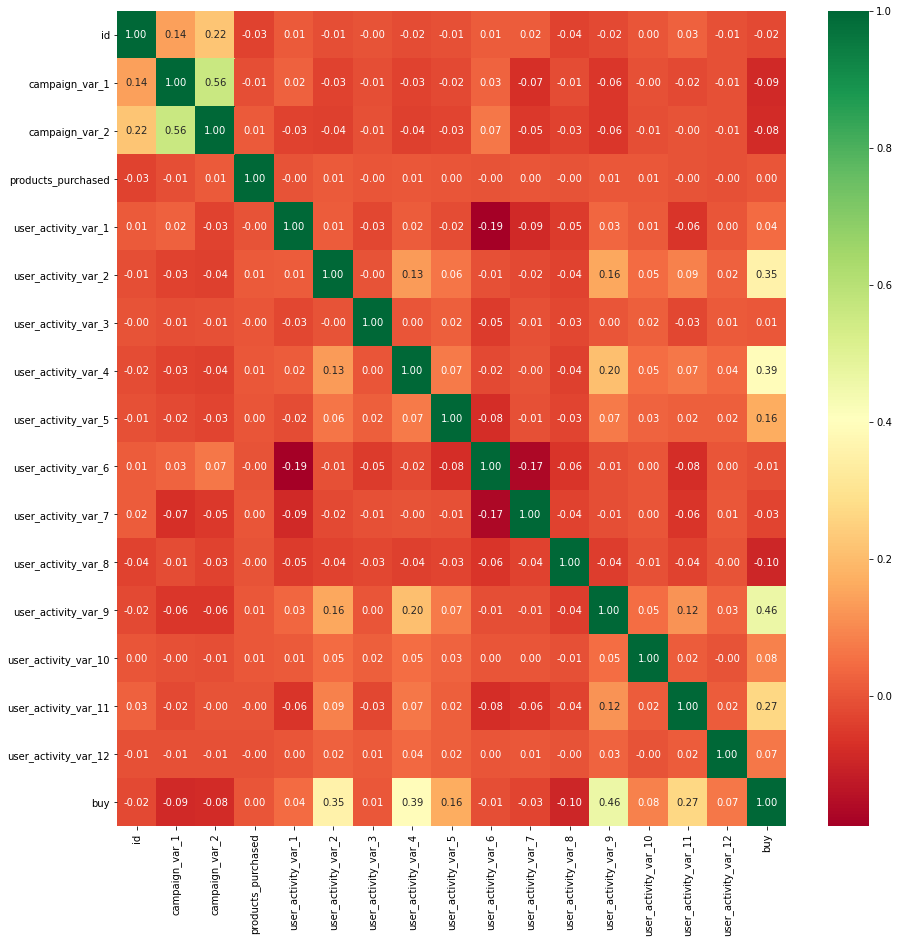

In [12]:
#finding correlation between features
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='RdYlGn')
plt.show()

### DATA VISUALIZATION

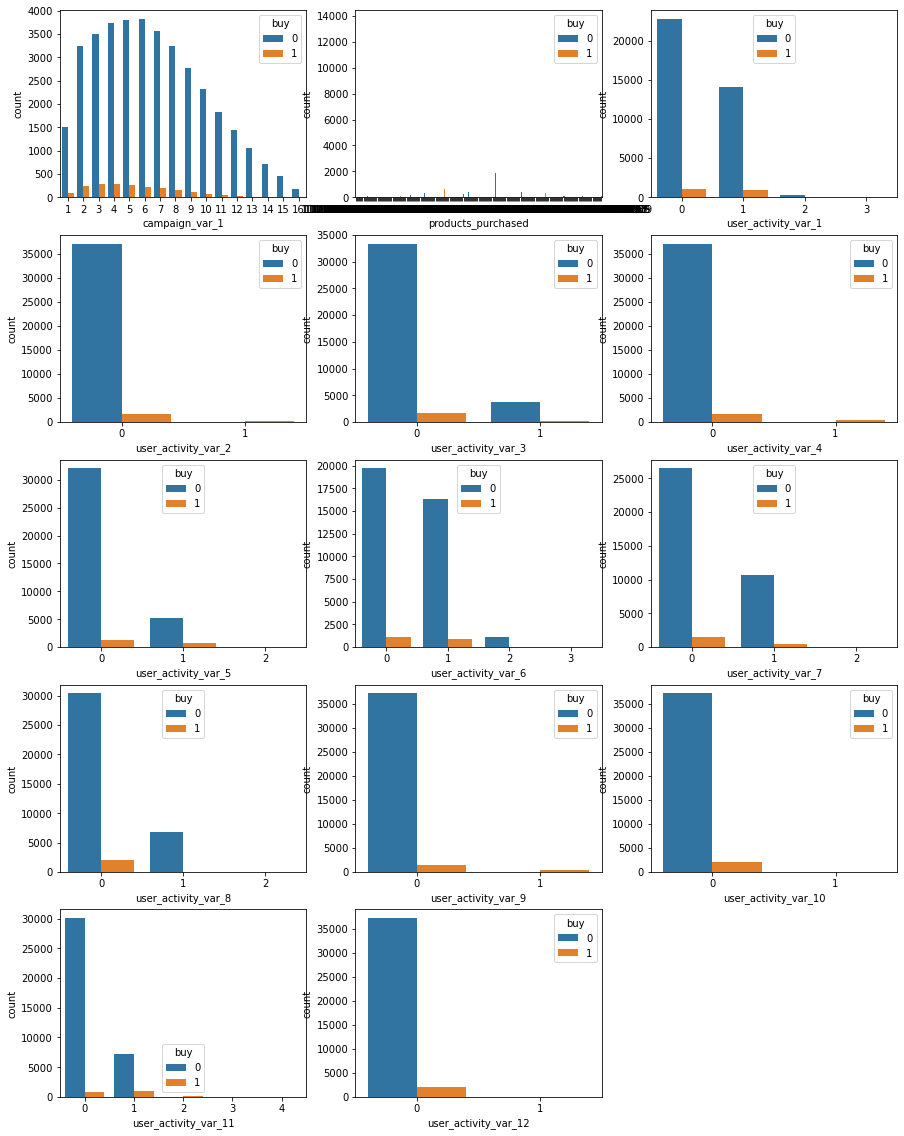

In [13]:
cols=['campaign_var_1' ,'products_purchased' ,'user_activity_var_1' ,'user_activity_var_2' ,'user_activity_var_3' ,'user_activity_var_4','user_activity_var_5' ,'user_activity_var_6','user_activity_var_7' ,'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11' ,'user_activity_var_12']
list(enumerate(cols))
plt.figure(figsize=(15,20))
for i in enumerate(cols):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(x=i[1],hue='buy',data=df)


### CONVERTING DATE TIME OBJECT INTO MONTHS, DAYS AND YEARS

In [14]:
df['signup_date'] = df['signup_date'].fillna('No Purchase')
df["created_at"] = df["created_at"].fillna('No Purchase')

In [15]:
df["day_created_at"] = df['created_at'] [df['created_at'] != str('No Purchase')].str.split('-').str[2].astype(int)
df["month_created_at"] = df['created_at'] [df['created_at'] != str('No Purchase')].str.split('-').str[1].astype(int)
df["year_created_at"] = df['created_at'] [df['created_at'] != str('No Purchase')].str.split('-').str[0].astype(int)

In [16]:
df["month_created_at"].nunique(),df["day_created_at"].nunique()

(12, 31)

In [17]:
df['day_signup'] = df['signup_date'] [df['signup_date'] != str('No Purchase')].str.split('-').str[2].astype(int)
df["month_signup"] = df['signup_date'][df['signup_date'] != str('No Purchase')].str.split('-').str[1].astype(int)
df["year_signup"] = df['signup_date'][df['signup_date'] != str('No Purchase')].str.split('-').str[0].astype(int)

In [18]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_created_at,month_created_at,year_created_at,day_signup,month_signup,year_signup
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,0,0,0,1,1,2021,24.0,9.0,2020.0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,0,0,0,1,1,2021,19.0,9.0,2020.0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,1,1,2021,11.0,8.0,2021.0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,1,1,2021,4.0,10.0,2017.0
4,5,2021-01-01,4,6,2.5,2020-06-08,0,0,0,0,...,0,1,0,0,1,1,2021,8.0,6.0,2020.0


In [19]:
dff = df.drop(['created_at','signup_date'],axis=1)
dff.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_created_at,month_created_at,year_created_at,day_signup,month_signup,year_signup
0,1,1,2,2.0,0,0,0,0,0,0,...,0,0,0,0,1,1,2021,24.0,9.0,2020.0
1,2,2,1,2.0,1,0,1,0,0,0,...,0,0,0,0,1,1,2021,19.0,9.0,2020.0
2,3,9,3,3.0,1,0,0,0,0,0,...,0,0,0,0,1,1,2021,11.0,8.0,2021.0
3,4,6,7,2.0,0,0,0,0,0,0,...,0,0,0,0,1,1,2021,4.0,10.0,2017.0
4,5,4,6,2.5,0,0,0,0,0,0,...,0,1,0,0,1,1,2021,8.0,6.0,2020.0


<AxesSubplot:xlabel='month_created_at', ylabel='count'>

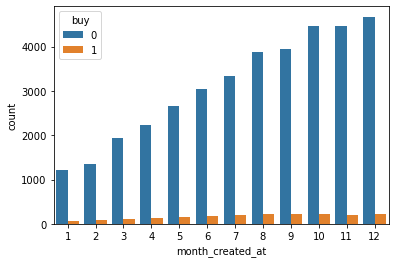

In [20]:
 sns.countplot(x='month_created_at',hue='buy',data=dff)

<AxesSubplot:xlabel='year_signup', ylabel='count'>

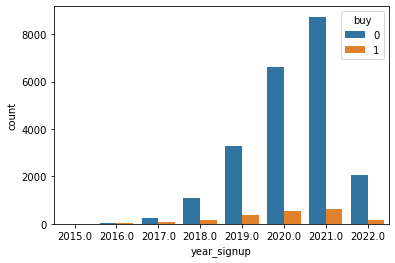

In [21]:
 sns.countplot(x='year_signup',hue='buy',data=dff)

<AxesSubplot:xlabel='month_signup', ylabel='count'>

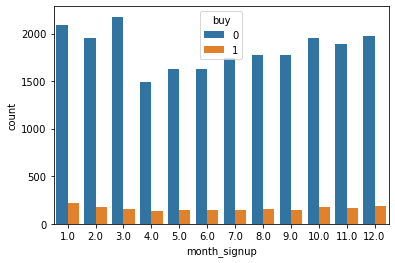

In [22]:
 sns.countplot(x='month_signup',hue='buy',data=dff)

In [23]:
X=dff[df['signup_date'] != str('No Purchase')][df['products_purchased'] != str('No Purchase')].drop('buy',axis=1)
y=df[df['signup_date'] != str('No Purchase')][df['products_purchased'] != str('No Purchase')]['buy']

<ipython-input-23-fa2d31774c99>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X=dff[df['signup_date'] != str('No Purchase')][df['products_purchased'] != str('No Purchase')].drop('buy',axis=1)
<ipython-input-23-fa2d31774c99>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y=df[df['signup_date'] != str('No Purchase')][df['products_purchased'] != str('No Purchase')]['buy']


### RELEVANT FEATURE SELECTION

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([0.00014222, 0.00416976, 0.00620796, 0.00186977, 0.00093703,
       0.02481396, 0.        , 0.03695742, 0.01935259, 0.00323336,
       0.        , 0.00787337, 0.04832843, 0.00123683, 0.04349684,
       0.00036145, 0.        , 0.00161775, 0.00662462, 0.        ,
       0.00104776, 0.00522679])

In [25]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
id,0.000824
campaign_var_1,0.007601
campaign_var_2,0.005644
products_purchased,0.002190
user_activity_var_1,0.002499
user_activity_var_2,0.028905
user_activity_var_3,0.000387
user_activity_var_4,0.036061
user_activity_var_5,0.019521
user_activity_var_6,0.003968


### SORTING FEATURES BY IMPORTANCE

In [26]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
user_activity_var_9,0.049946
user_activity_var_11,0.041182
user_activity_var_4,0.036061
user_activity_var_2,0.028905
user_activity_var_5,0.019521
campaign_var_1,0.007601
year_signup,0.007498
user_activity_var_8,0.007378
campaign_var_2,0.005644
year_created_at,0.005418


### As we can see from the table, there are several features that have approx 0 value,so we should remove it.


In [27]:
train_data = X.drop(['id','user_activity_var_7','products_purchased','month_signup','day_created_at'],axis=1)
train_data.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,month_created_at,year_created_at,day_signup,year_signup
0,1,2,0,0,0,0,0,0,1,0,0,0,0,1,2021,24.0,2020.0
1,2,1,1,0,1,0,0,0,0,0,0,0,0,1,2021,19.0,2020.0
2,9,3,1,0,0,0,0,0,0,0,0,0,0,1,2021,11.0,2021.0
3,6,7,0,0,0,0,0,0,0,0,0,0,0,1,2021,4.0,2017.0
4,4,6,0,0,0,0,0,0,0,0,0,1,0,1,2021,8.0,2020.0


In [28]:
train_data.shape

(24048, 17)

### Importing & manipulating Test dataset according to Train dataset


In [29]:
df = pd.read_csv('C:/Users/singh/Desktop/AV040622/test_Wf7sxXF.csv')
df.head(20)
df['signup_date'].isnull().sum()

6649

In [30]:
df['products_purchased'] = df['products_purchased'].interpolate( method ='linear',limit_direction='forward')

In [31]:
df['signup_date'] = df['signup_date'].fillna('No Purchase')

In [32]:
df["day_created_at"] = df['created_at'].str.split('-').str[2].astype(int)
df["month_created_at"] = df['created_at'].str.split('-').str[1].astype(int)
df['year_created_at'] = df['created_at'].str.split('-').str[0].astype(int)

In [33]:
df["day_signup"] = df[df['signup_date'] != str('No Purchase')]['signup_date'].str.split('-').str[2].astype(int)
df["month_signup"] = df[df['signup_date'] != str('No Purchase')]['signup_date'].str.split('-').str[1].astype(int)
df["year_signup"] = df[df['signup_date'] != str('No Purchase')]['signup_date'].str.split('-').str[0].astype(int)

In [34]:
df.head(20)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,day_created_at,month_created_at,year_created_at,day_signup,month_signup,year_signup
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,...,0,0,1,0,1,1,2022,17.0,8.0,2021.0
1,39163,2022-01-01,4,7,3.000000,2020-05-21,1,0,0,0,...,0,0,0,0,1,1,2022,21.0,5.0,2020.0
2,39164,2022-01-01,8,7,2.500000,No Purchase,0,0,0,0,...,0,0,0,0,1,1,2022,NaN,NaN,NaN
3,39165,2022-01-01,9,8,2.000000,2020-06-22,0,0,0,0,...,0,0,2,0,1,1,2022,22.0,6.0,2020.0
4,39166,2022-01-01,4,5,2.000000,2021-03-10,1,0,0,0,...,0,0,0,0,1,1,2022,10.0,3.0,2021.0
5,39167,2022-01-01,13,5,1.500000,No Purchase,1,0,0,0,...,0,0,0,0,1,1,2022,NaN,NaN,NaN
6,39168,2022-01-01,2,4,1.000000,2021-09-08,1,0,0,0,...,0,0,0,0,1,1,2022,8.0,9.0,2021.0
7,39169,2022-01-01,1,8,1.200000,2021-09-11,0,0,0,0,...,0,0,1,0,1,1,2022,11.0,9.0,2021.0
8,39170,2022-01-01,6,4,1.400000,No Purchase,1,0,0,0,...,0,0,0,0,1,1,2022,NaN,NaN,NaN
9,39171,2022-01-01,3,4,1.600000,2020-06-18,1,0,0,0,...,0,0,0,0,1,1,2022,18.0,6.0,2020.0


In [35]:
#Dropping irrelevant columns similar to train data
test_data = df.drop(['id','user_activity_var_7','created_at' ,'signup_date','products_purchased','month_signup','day_created_at'],axis=1)
test_data.head()


,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,month_created_at,year_created_at,day_signup,year_signup
0,2,2,1,1,0,0,0,1,0,0,0,1,0,1,2022,17.0,2021.0
1,4,7,1,0,0,0,0,0,1,0,0,0,0,1,2022,21.0,2020.0
2,8,7,0,0,0,0,1,1,0,0,0,0,0,1,2022,NaN,NaN
3,9,8,0,0,0,0,1,1,0,0,0,2,0,1,2022,22.0,2020.0
4,4,5,1,0,0,0,0,0,0,0,0,0,0,1,2022,10.0,2021.0


In [36]:
test_data['day_signup'] = test_data['day_signup'].interpolate( method ='linear',limit_direction='forward')
test_data['year_signup'] = test_data['year_signup'].interpolate( method ='linear',limit_direction='forward')
test_data['month_created_at'] = test_data['month_created_at'].interpolate( method ='linear',limit_direction='forward')
test_data['year_created_at'] = test_data['year_created_at'].interpolate( method ='linear',limit_direction='forward')

In [37]:
test_data.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,month_created_at,year_created_at,day_signup,year_signup
0,2,2,1,1,0,0,0,1,0,0,0,1,0,1,2022,17.0,2021.0
1,4,7,1,0,0,0,0,0,1,0,0,0,0,1,2022,21.0,2020.0
2,8,7,0,0,0,0,1,1,0,0,0,0,0,1,2022,21.5,2020.0
3,9,8,0,0,0,0,1,1,0,0,0,2,0,1,2022,22.0,2020.0
4,4,5,1,0,0,0,0,0,0,0,0,0,0,1,2022,10.0,2021.0


In [38]:
test_data.shape
#dff=test_data[(test_data['day_signup'] != str('No Purchase'))&(test_data['month_signup'] != str('No Purchase'))&(test_data['year_signup'] != str('No Purchase'))]

(13184, 17)

### MODEL IMPLEMENTATION

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(train_data, y)
X_train_balanced,X_test_balanced,y_train_balanced,y_test_balanced=train_test_split(X_balanced,y_balanced,test_size=0.3,random_state=5)

In [41]:
X_balanced.shape

(44150, 17)

In [42]:
#DecisionTreeClassifier()
DTmodel=  DecisionTreeClassifier(criterion = 'entropy',splitter = 'random',max_depth=13)  
DTmodel.fit(X_train_balanced,y_train_balanced)
trainscore_dt=  round(DTmodel.score(X_train_balanced,y_train_balanced)* 100, 2)
testscore =  DTmodel.score(X_test_balanced,y_test_balanced)  

y_pred =  DTmodel.predict(X_test_balanced)
print(' f1 score: ',f1_score(y_test_balanced, y_pred),'\n')
print(confusion_matrix(y_test_balanced, y_pred))

 f1 score:  0.7789565470135156 

[[4843 1773]
 [1269 5360]]


In [43]:
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      6616
           1       0.75      0.81      0.78      6629

    accuracy                           0.77     13245
   macro avg       0.77      0.77      0.77     13245
weighted avg       0.77      0.77      0.77     13245



In [89]:
#RandomForestClassifier
RFmodel=  RandomForestClassifier(random_state=45 ,n_jobs=-2, n_estimators = 150, max_features = 17)
RFmodel.fit(X_train_balanced,y_train_balanced)
trainscore_rf= round(RFmodel.score(X_train_balanced,y_train_balanced)* 100, 2)
testscore =  RFmodel.score(X_test_balanced,y_test_balanced)  

y_pred =  RFmodel.predict(X_test_balanced)
print(' f1 score: ',f1_score(y_test_balanced, y_pred),'\n')
print(confusion_matrix(y_test_balanced, y_pred))


 f1 score:  0.9452601460733379 

[[6241  375]
 [ 352 6277]]


In [90]:
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6616
           1       0.94      0.95      0.95      6629

    accuracy                           0.95     13245
   macro avg       0.95      0.95      0.95     13245
weighted avg       0.95      0.95      0.95     13245



In [73]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_balanced,y_train_balanced)
Y_pred = knn.predict(X_test_balanced)
acc_knn = round(knn.score(X_train_balanced,y_train_balanced) * 100, 2)
acc_knn
print(' f1 score: ',f1_score(y_test_balanced, y_pred),'\n')
print(confusion_matrix(y_test_balanced, y_pred))

C:\Users\singh\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


 f1 score:  0.8938423840012648 

[[6248  368]
 [ 975 5654]]


In [71]:
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6616
           1       0.94      0.85      0.89      6629

    accuracy                           0.90     13245
   macro avg       0.90      0.90      0.90     13245
weighted avg       0.90      0.90      0.90     13245



In [72]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_balanced,y_train_balanced)
Y_pred = gaussian.predict(X_test_balanced)
acc_gaussian = round(gaussian.score(X_train_balanced,y_train_balanced) * 100, 2)
acc_gaussian
print(' f1 score: ',f1_score(y_test_balanced, y_pred),'\n')
print(confusion_matrix(y_test_balanced, y_pred))


 f1 score:  0.8938423840012648 

[[6248  368]
 [ 975 5654]]


In [49]:
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6616
           1       0.95      0.95      0.95      6629

    accuracy                           0.95     13245
   macro avg       0.95      0.95      0.95     13245
weighted avg       0.95      0.95      0.95     13245



In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.7,
                              n_estimators=1000)

adaBoost.fit(X_train_balanced,y_train_balanced)

y_pred = adaBoost.predict(X_test_balanced)

from sklearn.metrics import accuracy_score

ada_score=accuracy_score(y_test_balanced, y_pred)
round(ada_score*100,2)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


91.7

In [52]:
models = pd.DataFrame({
        'Model': ['Random Forest',
                   'Decision Tree','KNN classfier','Naive Bayes'],
        'Score': [
              trainscore_rf, 
              trainscore_dt,acc_knn,acc_gaussian]
    })
models.sort_values(by='Score', ascending=False)



,Model,Score
0,Random Forest,99.94
2,KNN classfier,93.35
1,Decision Tree,78.08
3,Naive Bayes,58.25


### Predicting on test data

In [53]:
pred=RFmodel.predict(test_data)
pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### SUBMISSION

In [54]:
sample_submission = pd.DataFrame({
        "id": df['id'],
        "buy": pred
    })
sample_submission.to_csv('C:/Users/singh/Desktop/AV040622/sample_submission.csv', index=False)
#print(submission)